# Data Exploration of a Movies Dataset from Kaggle 

### Investigating Correlation

Data source: https://www.kaggle.com/datasets/danielgrijalvas/movies

In this project, I will investigating the correlation between the budget vs gross revenue of the films in this comprehensive data set, as well as exploring the relationship between movie genre and score.

In [177]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [178]:
# Read in data
movies = pd.read_csv('movies.csv')

# Inspect data
movies.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [179]:
# Size of dataframe
movies.shape

(7668, 15)

In [180]:
# Check for duplicates
duplicates = movies.duplicated()
print(duplicates.value_counts())


False    7668
dtype: int64


In [181]:
# Check for null values
movies.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

There are a significant number of null values especially in the budget column. 
As I will be investigating budget vs gross revenue from films, I will drop all rows with null values.

In [182]:
# Drop null values in budget column
movies = movies.dropna(subset=['budget'])

# Drop null values in company column
movies = movies.dropna(subset=['company'])

In [183]:
# Check for null values now after dropping null values in budget column
movies.isna().sum()

name         0
rating      16
genre        0
year         0
released     0
score        1
votes        1
director     0
writer       0
star         1
country      1
budget       0
gross       57
company      0
runtime      2
dtype: int64

In [184]:
# Drop null values in some other columns
movies = movies.dropna(subset=['gross', 'runtime', 'country'])

In [185]:
# Update on the null values
movies.isna().sum()

name         0
rating      11
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

This looks much better. I won't be looking at ratings, so I'll leave those null rows in.

In [187]:
# Data types for each column
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [188]:
# Fix data types of budget and gross columns
movies['budget'] = movies['budget'].astype('int64')

movies['gross'] = movies['gross'].astype('int64')

In [189]:
# Check the datatypes changed
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [190]:
# The released year is not the same as the year column (when the movie was made)
# I will isolate the year

movies_year_split = movies.released.str.split(('\,'), expand=True)
movies_year_split = movies_year_split[1].str.split('(', expand=True)

movies['year_released'] = movies_year_split[0]


In [191]:
# Sort values in dataframe by gross, descending
movies.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


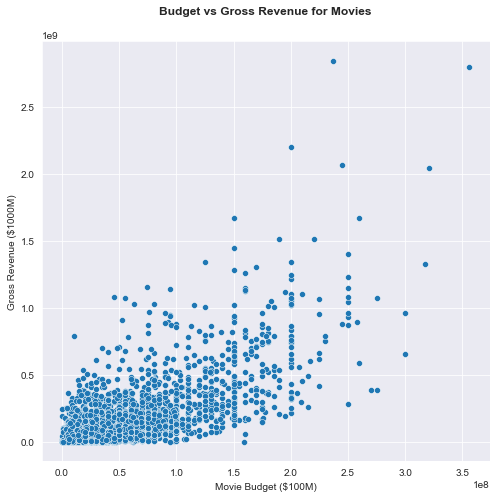

In [212]:
# Plotting correlations

# Scatterplot of gross vs budget
sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
sns.scatterplot(x=movies.budget, y=movies.gross)
plt.title('Budget vs Gross Revenue for Movies', fontweight='bold', y=1.05)
plt.xlabel('Movie Budget ($100M)')
plt.ylabel('Gross Revenue ($1000M)')
plt.tight_layout()
plt.show()


We see some massive outliers of Gross revenue.

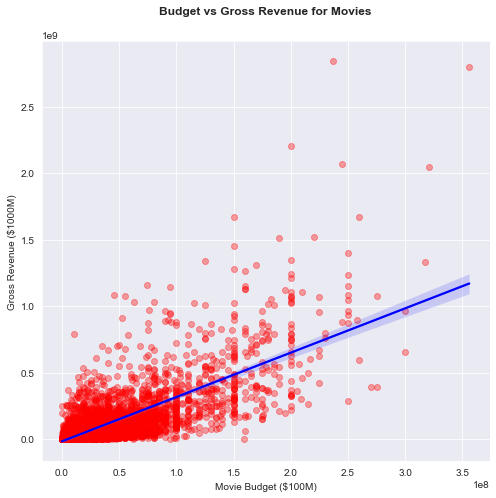

In [213]:
# Reg plot
plt.figure(figsize=(7,7))
sns.regplot(x='budget', y='gross', data=movies, scatter_kws={'alpha':0.35, 'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Budget vs Gross Revenue for Movies', fontweight='bold', y=1.05)
plt.xlabel('Movie Budget ($100M)')
plt.ylabel('Gross Revenue ($1000M)')
plt.tight_layout()
plt.show()

In [214]:
# Check correlation of numeric fields with correlation matrix
movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000


There is a relatively strong correlation between the Gross and Budget: 0.740362

The score has a weak correlation with the gross (0.22195) and budget (0.071568) amounts.
This is interesting, as a huge budget does not necessarily equate to a higher score, not does a high gross imply the movie will likely have a higher score.

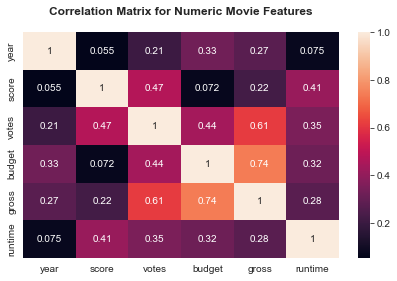

In [215]:
# Plot heatmap
corr_matrix = movies.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Movie Features', fontweight='bold', y=1.05)
#plt.xlabel('Movie Features')
#plt.ylabel('Movie Features')
plt.tight_layout()
plt.show()

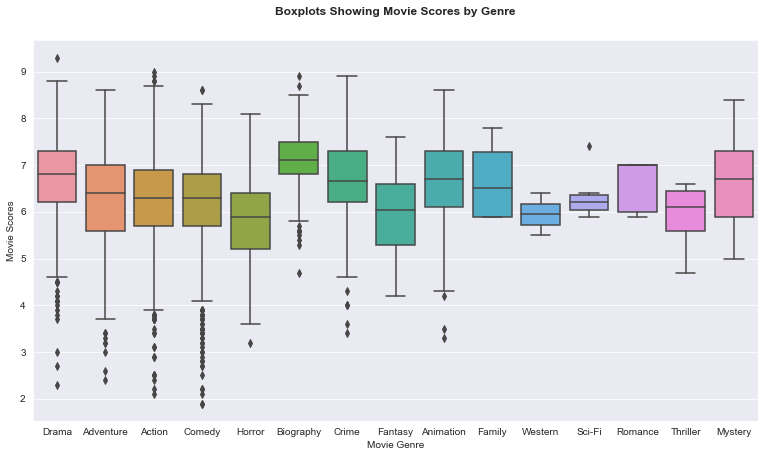

In [220]:
# Investigate if certain genres have higher scores
sns.set_palette('Set3')
plt.figure(figsize=(13,7))
sns.boxplot(x='genre', y='score', data=movies)
plt.xlabel('Movie Genre')
plt.ylabel('Movie Scores')
plt.title('Boxplots Showing Movie Scores by Genre', fontweight='bold', y=1.05)
plt.show()

From the boxplots above, we can see that Horrors and Westerns have the lowest median scores. Biographies have the highest median score.

In conclusion, there is a relatively strong correlation between the Gross revenue and Budget of a film. This is good news for the movie producers and companies, as they are spending millions to make a film, and want to see a good return on their investments.